Ecuación de la Regresión Lineal Múltiple: Ventas = -56.94 + 1.34 * Temperatura + 0.42 * Clientes
Coeficiente de correlación (Temperatura-Ventas): 0.54
Coeficiente de correlación (Clientes-Ventas): 0.45
Predicción de Ventas para Temperatura=30 y Clientes=160: 50.10
Coeficiente de determinación (R²): 0.50


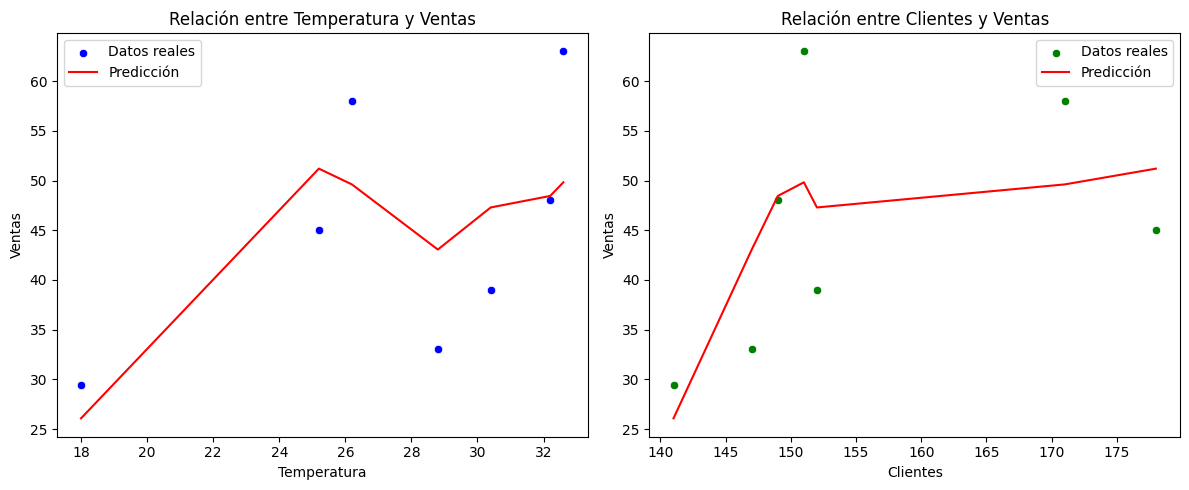

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Datos
data = {
    "Día": [1, 2, 3, 4, 5, 6, 7],
    "Ventas": [29.4, 45, 63, 58, 48, 39, 33.1],
    "Temperatura": [18, 25.2, 32.6, 26.2, 32.2, 30.4, 28.8],
    "Clientes": [141, 178, 151, 171, 149, 152, 147]
}

df = pd.DataFrame(data)

# Variables 
X = df[["Temperatura", "Clientes"]]
y = df["Ventas"]

# Agregar constante para la regresión con statsmodels
X_sm = sm.add_constant(X)
modelo = sm.OLS(y, X_sm).fit()

# Predicciones
y_pred = modelo.predict(X_sm)

# correlación y de determinación
r2 = r2_score(y, y_pred)
correlation_matrix = df.corr()
correlation_temp_ventas = correlation_matrix.loc["Temperatura", "Ventas"]
correlation_clientes_ventas = correlation_matrix.loc["Clientes", "Ventas"]

# Imprimir ecuación de la regresión
coef = modelo.params
print(f"Ecuación de la Regresión Lineal Múltiple: Ventas = {coef.iloc[0]:.2f} + {coef.iloc[1]:.2f} * Temperatura + {coef.iloc[2]:.2f} * Clientes")
print(f"Coeficiente de correlación (Temperatura-Ventas): {correlation_temp_ventas:.2f}")
print(f"Coeficiente de correlación (Clientes-Ventas): {correlation_clientes_ventas:.2f}")

#Predicción con un nuevo dato
temperatura_nueva = 30
clientes_nuevos = 160
ventas_predicha = modelo.predict([[1, temperatura_nueva, clientes_nuevos]])[0]
print(f"Predicción de Ventas para Temperatura={temperatura_nueva} y Clientes={clientes_nuevos}: {ventas_predicha:.2f}")

# coeficiente de determinación
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# Gráficos de dispersión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Temperatura"], y=df["Ventas"], color="blue", label="Datos reales")
sns.lineplot(x=df["Temperatura"], y=y_pred, color="red", label="Predicción")
plt.xlabel("Temperatura")
plt.ylabel("Ventas")
plt.title("Relación entre Temperatura y Ventas")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["Clientes"], y=df["Ventas"], color="green", label="Datos reales")
sns.lineplot(x=df["Clientes"], y=y_pred, color="red", label="Predicción")
plt.xlabel("Clientes")
plt.ylabel("Ventas")
plt.title("Relación entre Clientes y Ventas")

plt.tight_layout()
plt.show()




